In [284]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import visualization as vis
from sfp_nsdsyn import two_dimensional_model as model
from sfp_nsdsyn import preprocessing as prep
from sfp_nsdsyn import utils as utils
from sfp_nsdsyn import bootstrapping as bts
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load parameter files

In [266]:
results_dir='/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/derivatives/derivatives_HPC/results_2D'
dataset = 'broderick'
full_ver= [True]
if dataset == 'nsdsyn':
    sn_list = np.arange(1,9)
    stat = 'mean'
elif dataset == 'broderick':
    sn_list=[1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
    stat = 'median'
lr_rate = [0.0005]
max_epoch = [30000]
roi_list = ['V1']
fig_dir='/Users/jh7685/Dropbox/NYU/Projects/SF/MyResults/2D_tuning_prediction'

In [267]:
all_model_history = model.load_history_df_subj(results_dir, dataset, stat, full_ver, sn_list, lr_rate, max_epoch, 'model', roi_list)
final_params = all_model_history.query('epoch == 29999')

In [268]:
final_params

,epoch,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,dset,lr_rate,max_epoch,full_ver,subj,vroinames
29999,29999,2.984196,0.071027,0.400024,0.009960,-0.023560,0.005086,0.004069,0.031463,-0.007001,broderick,0.0005,30000,True,sub-wlsubj001,V1
59999,29999,2.207649,0.192008,0.318536,0.072753,-0.027144,0.036718,-0.007561,0.047686,0.008027,broderick,0.0005,30000,True,sub-wlsubj006,V1
89999,29999,1.859566,0.123812,0.328673,0.060503,-0.059433,0.160803,-0.005691,0.033455,0.018466,broderick,0.0005,30000,True,sub-wlsubj007,V1
119999,29999,1.839831,0.137402,0.193707,0.066500,-0.050486,0.016282,-0.014123,0.080934,-0.027548,broderick,0.0005,30000,True,sub-wlsubj045,V1
149999,29999,2.236669,0.101690,0.221754,0.039310,-0.023616,0.083696,0.022005,0.039015,-0.012657,broderick,0.0005,30000,True,sub-wlsubj046,V1
179999,29999,2.115541,0.132440,0.323145,-0.033379,-0.018277,-0.122890,0.097172,0.064806,-0.021059,broderick,0.0005,30000,True,sub-wlsubj062,V1
209999,29999,2.130340,0.136759,0.284252,0.091025,-0.036157,0.023343,0.001187,0.025593,0.001959,broderick,0.0005,30000,True,sub-wlsubj064,V1
239999,29999,2.249078,0.079767,0.374599,0.044345,-0.077721,0.177016,0.003899,0.037286,0.005977,broderick,0.0005,30000,True,sub-wlsubj081,V1
269999,29999,2.300413,0.121761,0.466371,0.125765,-0.021344,0.136857,-0.083407,-0.019852,0.014446,broderick,0.0005,30000,True,sub-wlsubj095,V1
299999,29999,2.089035,0.128973,0.312971,0.111180,-0.003874,0.062324,-0.035700,0.094206,-0.024604,broderick,0.0005,30000,True,sub-wlsubj114,V1


 ## melt final_params variable

In [269]:
params =['sigma','slope','intercept','p_1','p_2','p_3','p_4','A_1','A_2']
group = [1,2,2,3,3,3,3,3,3]

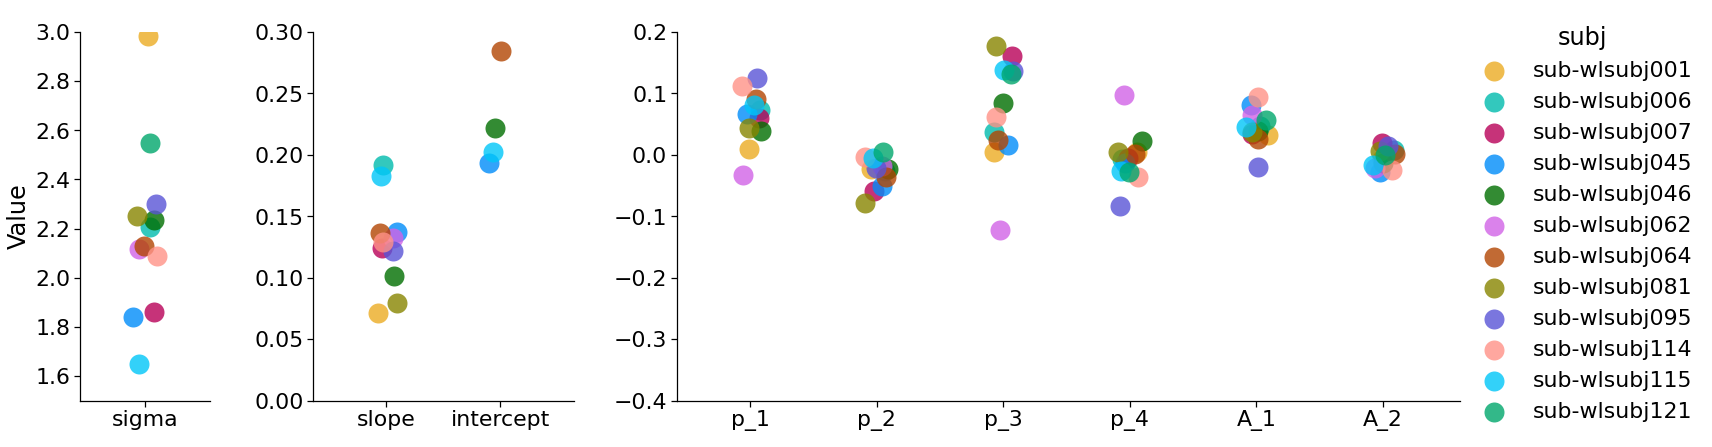

In [270]:
vis.plot_2D_model_results.plot_individual_parameters(final_params, params, group, save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_individual.png'))

## Precision-weighted averaged parameters

In [271]:
all_subj_df_mean = pd.DataFrame({})

In [272]:
for sn in sn_list:
    subj = utils.sub_number_to_string(sn, dataset)
    subj_df = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/{dataset}/{subj}_stim_voxel_info_df_vs-pRFsigma_V1.csv')
    subj_df = subj_df.drop_duplicates(['voxel'])
    subj_df = subj_df[['subj','sigma_v_squared']].groupby('subj').mean().reset_index()
    subj_df = subj_df.rename(columns={'sigma_v_squared': 'sigma_squared_s'})
    print(f'{sn}')
    all_subj_df_mean = all_subj_df_mean.append(subj_df)

46
62
64
81
95
114
115
121
1
6
7
45
46
62
64


KeyboardInterrupt: 

In [ ]:
all_subj_df_mean['sigma_squared_s'] = 1/all_subj_df_mean['sigma_squared_s']

In [ ]:
new_final_params = pd.merge(final_params, all_subj_df_mean[['subj','sigma_squared_s']], on='subj')

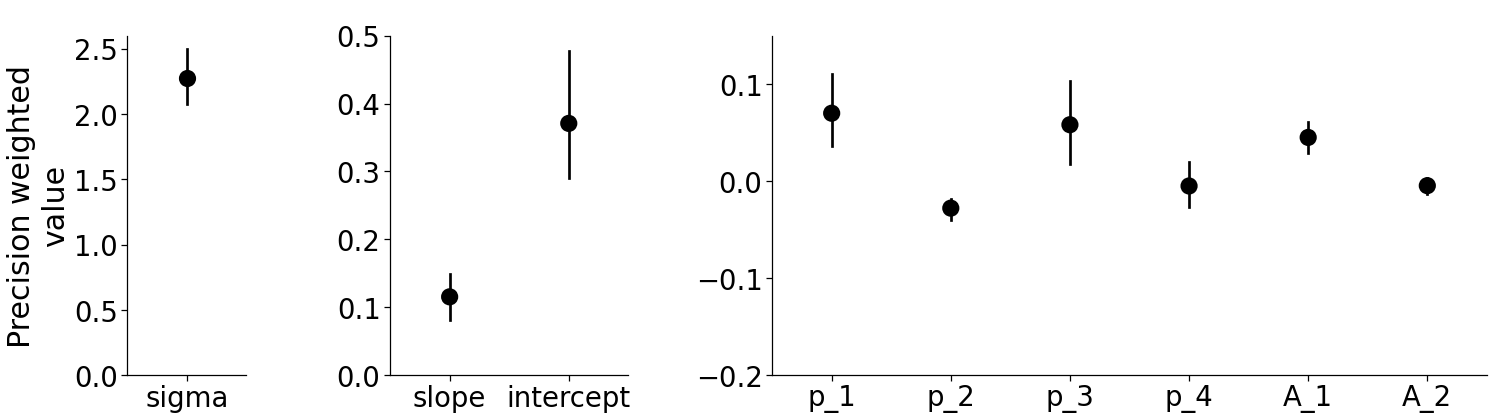

In [ ]:
grid = vis.plot_2D_model_results.plot_precision_weighted_avg_parameters(new_final_params, params, group, save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_precision_weighted_avg.png'))

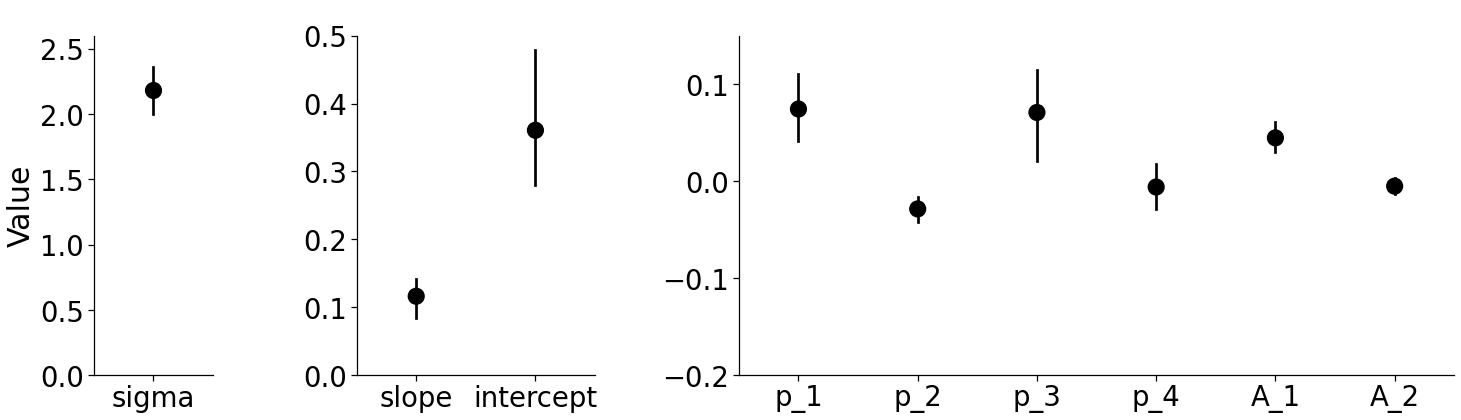

In [ ]:
grid = vis.plot_2D_model_results.plot_avg_parameters(final_params, params, group, save_fig=False, save_path=os.path.join(fig_dir, f'{dataset}_avg.png'))

In [282]:
broderick_params = new_final_params.copy()

In [280]:
nsd_model_history = model.load_history_df_subj(results_dir, 'nsdsyn', 'mean', full_ver, np.arange(1,9), lr_rate, max_epoch, 'model', roi_list)
nsd_params = nsd_model_history.query('epoch == 29999')

,epoch,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,dset,lr_rate,max_epoch,full_ver,subj,vroinames
29999,29999,2.444468,0.138925,0.216342,-0.160678,-0.045313,-0.114538,0.032326,0.040104,-0.072530,nsdsyn,0.0005,30000,True,subj01,V1
59999,29999,2.019560,0.123717,0.090956,-0.015425,-0.064137,0.147342,-0.048341,-0.006036,0.034134,nsdsyn,0.0005,30000,True,subj02,V1
89999,29999,2.579941,0.051193,0.111091,0.138689,-0.150462,0.163207,-0.040287,-0.021408,0.024107,nsdsyn,0.0005,30000,True,subj03,V1
119999,29999,1.975181,0.179895,0.122055,0.122718,-0.135793,0.099535,-0.013634,0.046516,0.028437,nsdsyn,0.0005,30000,True,subj04,V1
149999,29999,2.622015,0.107188,0.135675,-0.132166,-0.164759,0.016274,-0.027864,0.043370,0.011752,nsdsyn,0.0005,30000,True,subj05,V1
179999,29999,2.087170,0.166967,0.221159,0.159871,-0.173341,0.057587,0.040253,0.034356,-0.021300,nsdsyn,0.0005,30000,True,subj06,V1
209999,29999,2.249080,0.109479,0.093930,0.142332,-0.174437,0.123923,-0.144933,-0.023559,-0.029919,nsdsyn,0.0005,30000,True,subj07,V1
239999,29999,2.581744,0.199068,0.093001,-0.311129,-0.185420,0.065450,-0.000913,0.109359,0.023116,nsdsyn,0.0005,30000,True,subj08,V1


In [295]:
nsd_precision_df = pd.DataFrame({})
for sn in np.arange(1,9):
    subj = utils.sub_number_to_string(sn, 'nsdsyn')
    subj_df = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/{subj}_stim_voxel_info_df_vs-pRFsigma_V1.csv')
    tmp = bts.get_precision_s(subj_df, subset=['subj'])
    nsd_precision_df = nsd_precision_df.append(tmp)

In [293]:
broderick_params = broderick_params.rename(columns={'sigma_squared_s': 'precision'})

In [296]:
nsd_params = pd.merge(nsd_params, nsd_precision_df[['subj','precision']], on='subj')

In [298]:
all_dset_params = broderick_params.append(nsd_params)

In [307]:
test = vis.plot_2D_model_results.group_params(all_dset_params, params, group)

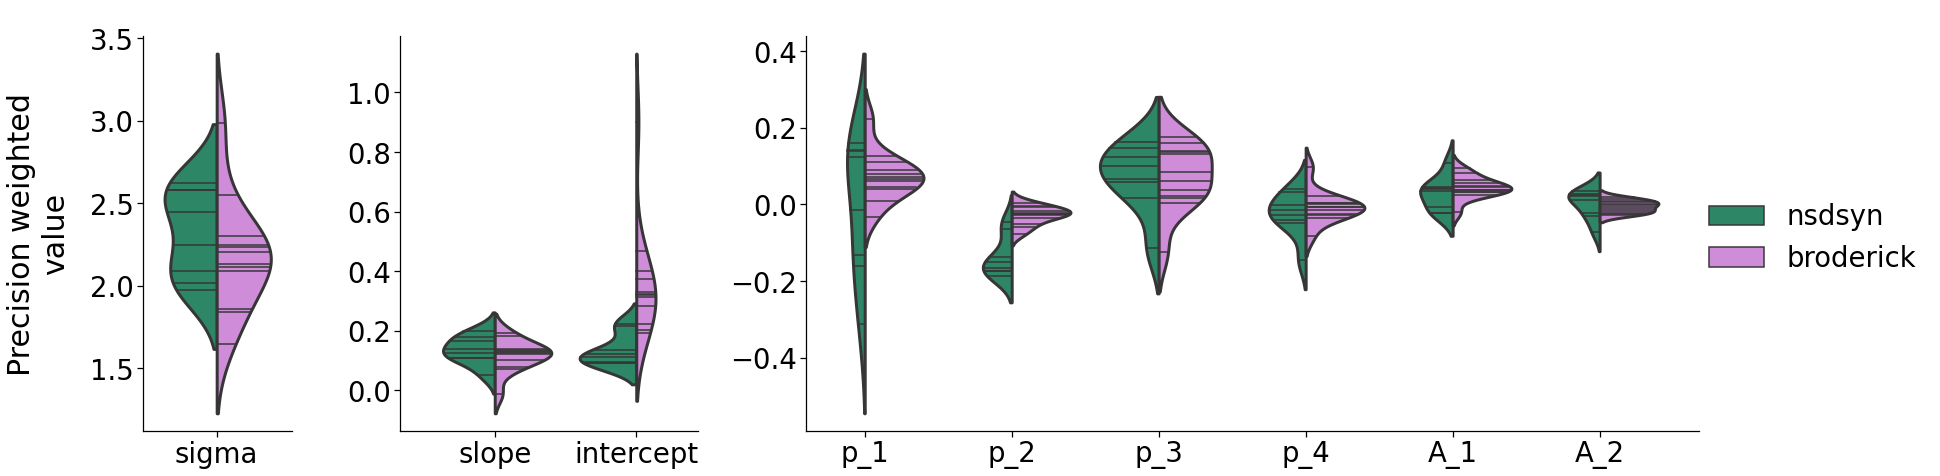

In [338]:
vis.plot_2D_model_results.violinplot_precision_weighted_avg_parameters(all_dset_params, params, group,
                                                                       save_fig=True,
                                                                       save_path=os.path.join(fig_dir, f'all_dsets_precision_weighted_params.png'))

In [ ]:
stim_info = pd.read_csv('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsynthetic_sf_stim_description.csv')
stim_info = stim_info[['names','names_idx','w_r','w_a','phase','class_idx','freq_lvl']]
stim_info = stim_info.drop_duplicates('names').drop(columns=['names_idx','phase','class_idx','freq_lvl'])
display(stim_info)

,names,w_r,w_a
0,pinwheel,0.0,6.0
24,forward spiral,4.0,4.0
48,annulus,6.0,0.0
72,reverse spiral,4.0,-4.0
96,intermediate 1,14.0,34.0
100,intermediate 2,34.0,14.0
104,intermediate 3,34.0,-14.0
108,intermediate 4,14.0,-34.0


In [ ]:
all_ecc_model_params = vis.plot_2D_model_results.merge_continuous_values_to_the_df(stim_info, val_range=(0,10), repeat=3, col_name='eccentricity')

In [ ]:
all_angle_model_params = vis.plot_2D_model_results.merge_continuous_values_to_the_df(all_ecc_model_params, val_range=(0,360), repeat=360, col_name='angle')
display(all_angle_model_params.head())
print(all_angle_model_params.shape)

,names,w_r,w_a,eccentricity,angle
0,pinwheel,0.0,6.0,0.0,0.0
1,forward spiral,4.0,4.0,0.0,0.0
2,annulus,6.0,0.0,0.0,0.0
3,reverse spiral,4.0,-4.0,0.0,0.0
4,intermediate 1,14.0,34.0,0.0,0.0


(8640, 5)


In [ ]:
synthetic_stim_df = prep._calculate_local_orientation(all_angle_model_params)
display(synthetic_stim_df)

,names,w_r,w_a,eccentricity,angle,local_ori
0,pinwheel,0.0,6.0,0.0,0.0,1.570796
1,forward spiral,4.0,4.0,0.0,0.0,0.785398
2,annulus,6.0,0.0,0.0,0.0,0.000000
3,reverse spiral,4.0,-4.0,0.0,0.0,2.356194
4,intermediate 1,14.0,34.0,0.0,0.0,1.180189
...,...,...,...,...,...,...
8635,reverse spiral,4.0,-4.0,10.0,360.0,2.356194
8636,intermediate 1,14.0,34.0,10.0,360.0,1.180189
8637,intermediate 2,34.0,14.0,10.0,360.0,0.390607
8638,intermediate 3,34.0,-14.0,10.0,360.0,2.750986


In [ ]:
synthetic_stim_df['angle'] = np.deg2rad(synthetic_stim_df['angle'])
synthetic_stim_df.tail()

,names,w_r,w_a,eccentricity,angle,local_ori
8635,reverse spiral,4.0,-4.0,10.0,6.283185,2.356194
8636,intermediate 1,14.0,34.0,10.0,6.283185,1.180189
8637,intermediate 2,34.0,14.0,10.0,6.283185,0.390607
8638,intermediate 3,34.0,-14.0,10.0,6.283185,2.750986
8639,intermediate 4,14.0,-34.0,10.0,6.283185,1.961403


In [ ]:
all_subj_df = pd.DataFrame({})
for sn in sn_list:
    subj = utils.sub_number_to_string(sn, dataset=dataset)
    subj_df = synthetic_stim_df.copy()
    subj_df['subj'] = subj
    subj_df['Pv'] = subj_df.apply(model.get_Pv_row, params=new_final_params.query('subj == @subj'), axis=1)
    all_subj_df = all_subj_df.append(subj_df, ignore_index=True)

print(all_subj_df.shape)

(103680, 8)


In [ ]:
new_subj_df = pd.merge(all_subj_df, new_final_params[['sigma_squared_s','subj']], on='subj')

In [ ]:
new_subj_df

,names,w_r,w_a,eccentricity,angle,local_ori,subj,Pv,sigma_squared_s
0,pinwheel,0.0,6.0,0.0,0.000000,1.570796,sub-wlsubj001,0.386208,10.369273
1,forward spiral,4.0,4.0,0.0,0.000000,0.785398,sub-wlsubj001,0.407821,10.369273
2,annulus,6.0,0.0,0.0,0.000000,0.000000,sub-wlsubj001,0.398246,10.369273
3,reverse spiral,4.0,-4.0,0.0,0.000000,2.356194,sub-wlsubj001,0.407821,10.369273
4,intermediate 1,14.0,34.0,0.0,0.000000,1.180189,sub-wlsubj001,0.395685,10.369273
...,...,...,...,...,...,...,...,...,...
103675,reverse spiral,4.0,-4.0,10.0,6.283185,2.356194,sub-wlsubj121,0.799262,5.570611
103676,intermediate 1,14.0,34.0,10.0,6.283185,1.180189,sub-wlsubj121,0.583462,5.570611
103677,intermediate 2,34.0,14.0,10.0,6.283185,0.390607,sub-wlsubj121,0.977883,5.570611
103678,intermediate 3,34.0,-14.0,10.0,6.283185,2.750986,sub-wlsubj121,0.977883,5.570611


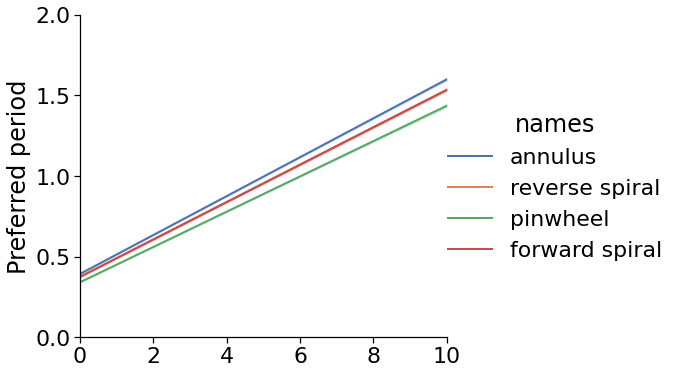

In [ ]:
stim_class = ['pinwheel','annulus','forward spiral','reverse spiral']
vis.plot_2D_model_results.plot_preferred_period(new_subj_df.query('names in @stim_class'), col=None,
                                                save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_precision_weighted_preferred_period.png'))

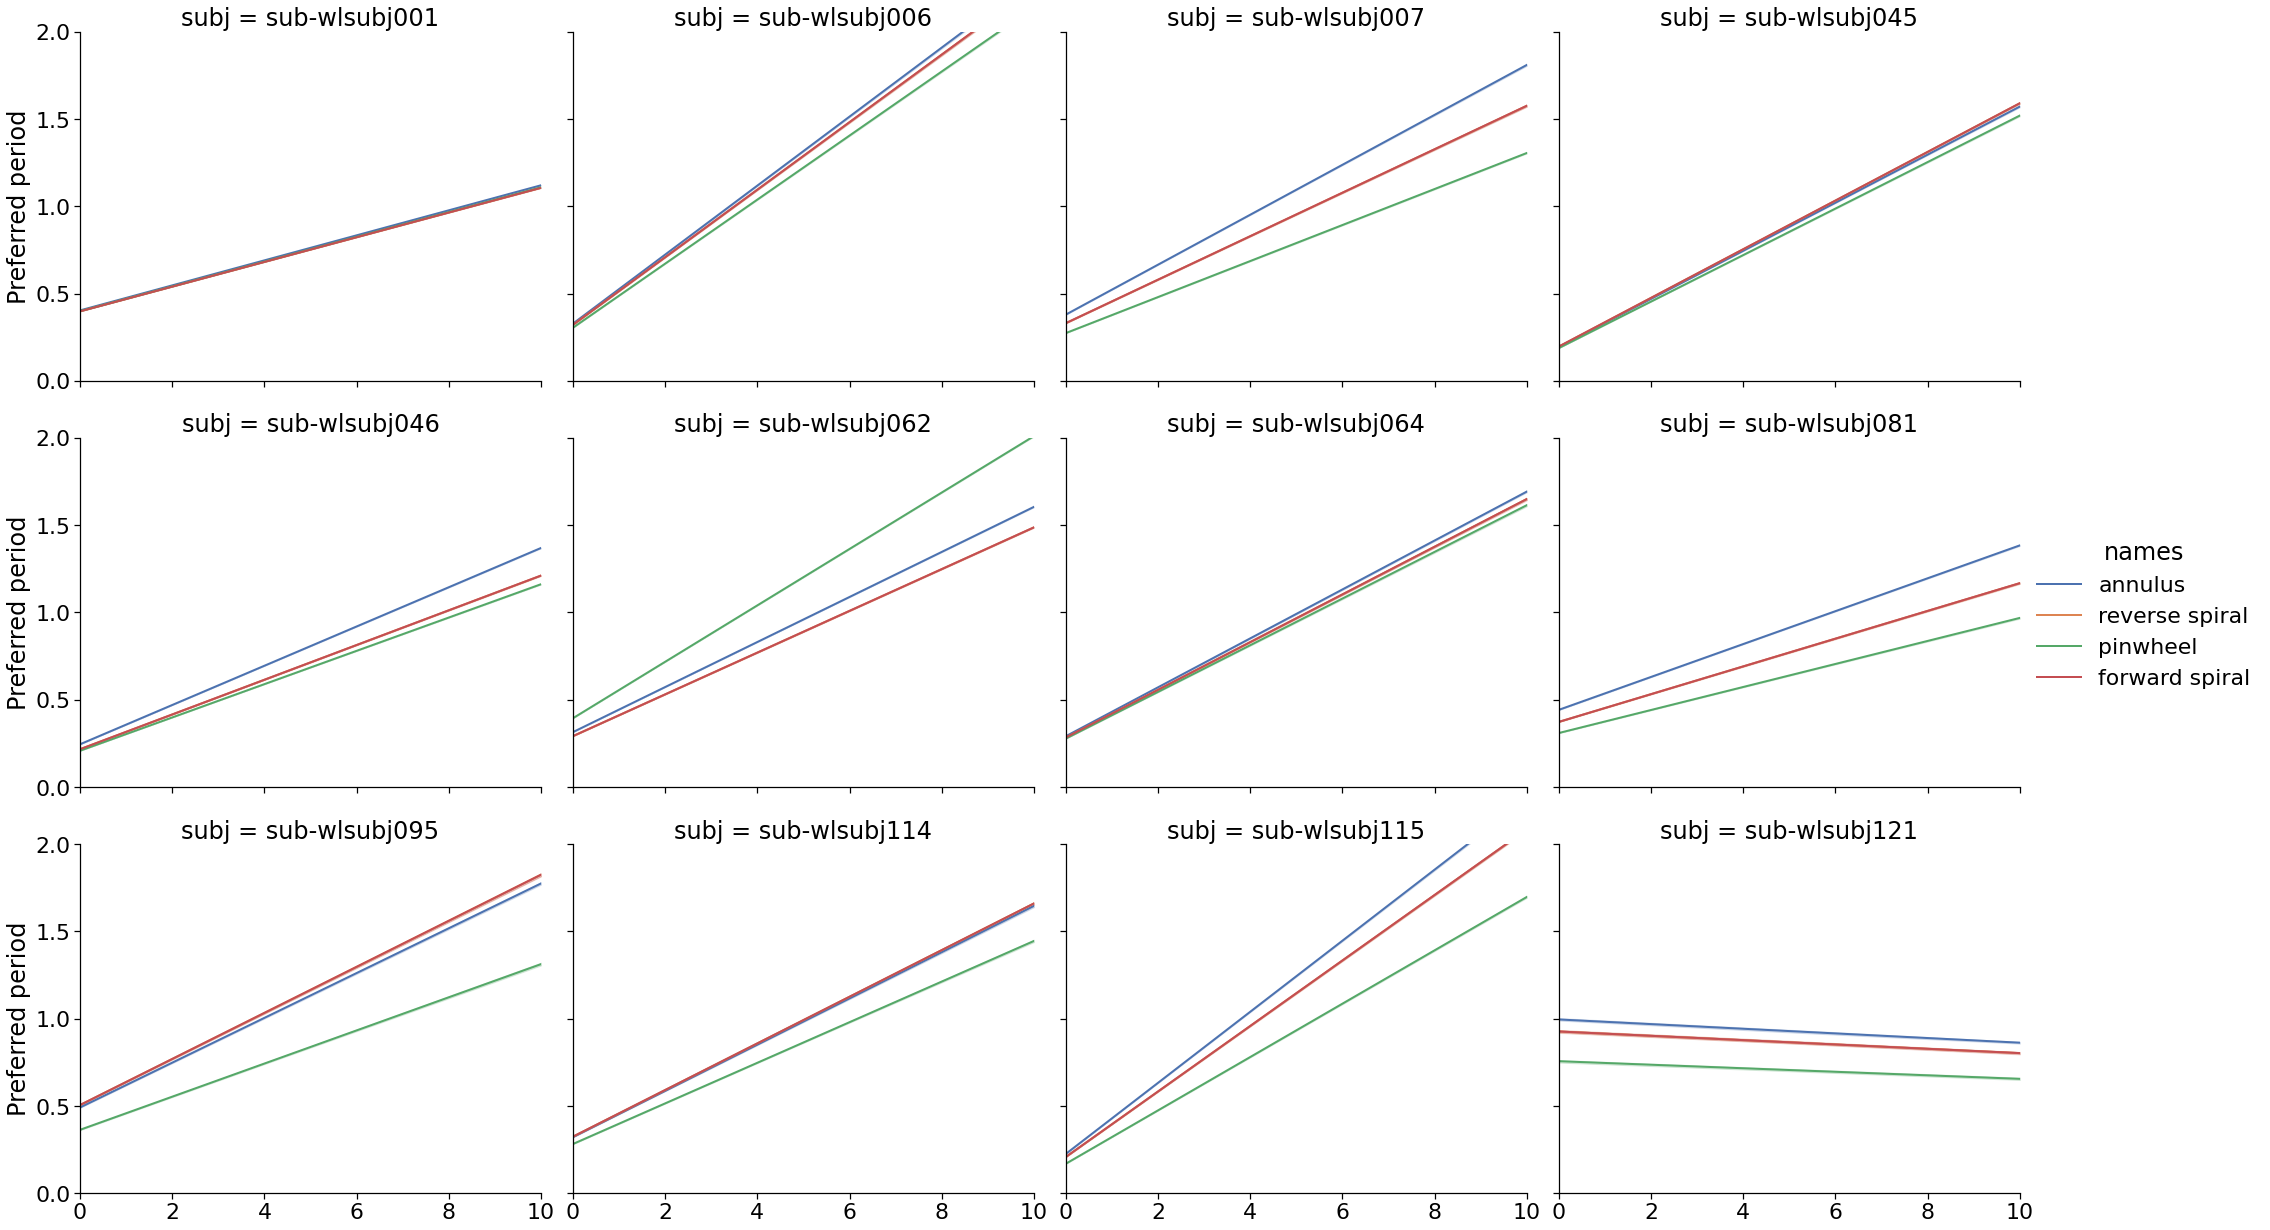

In [ ]:
vis.plot_2D_model_results.plot_preferred_period(new_subj_df.query('names in @stim_class'),
                                                save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_precision_weighted_preferred_period_individual.png'))

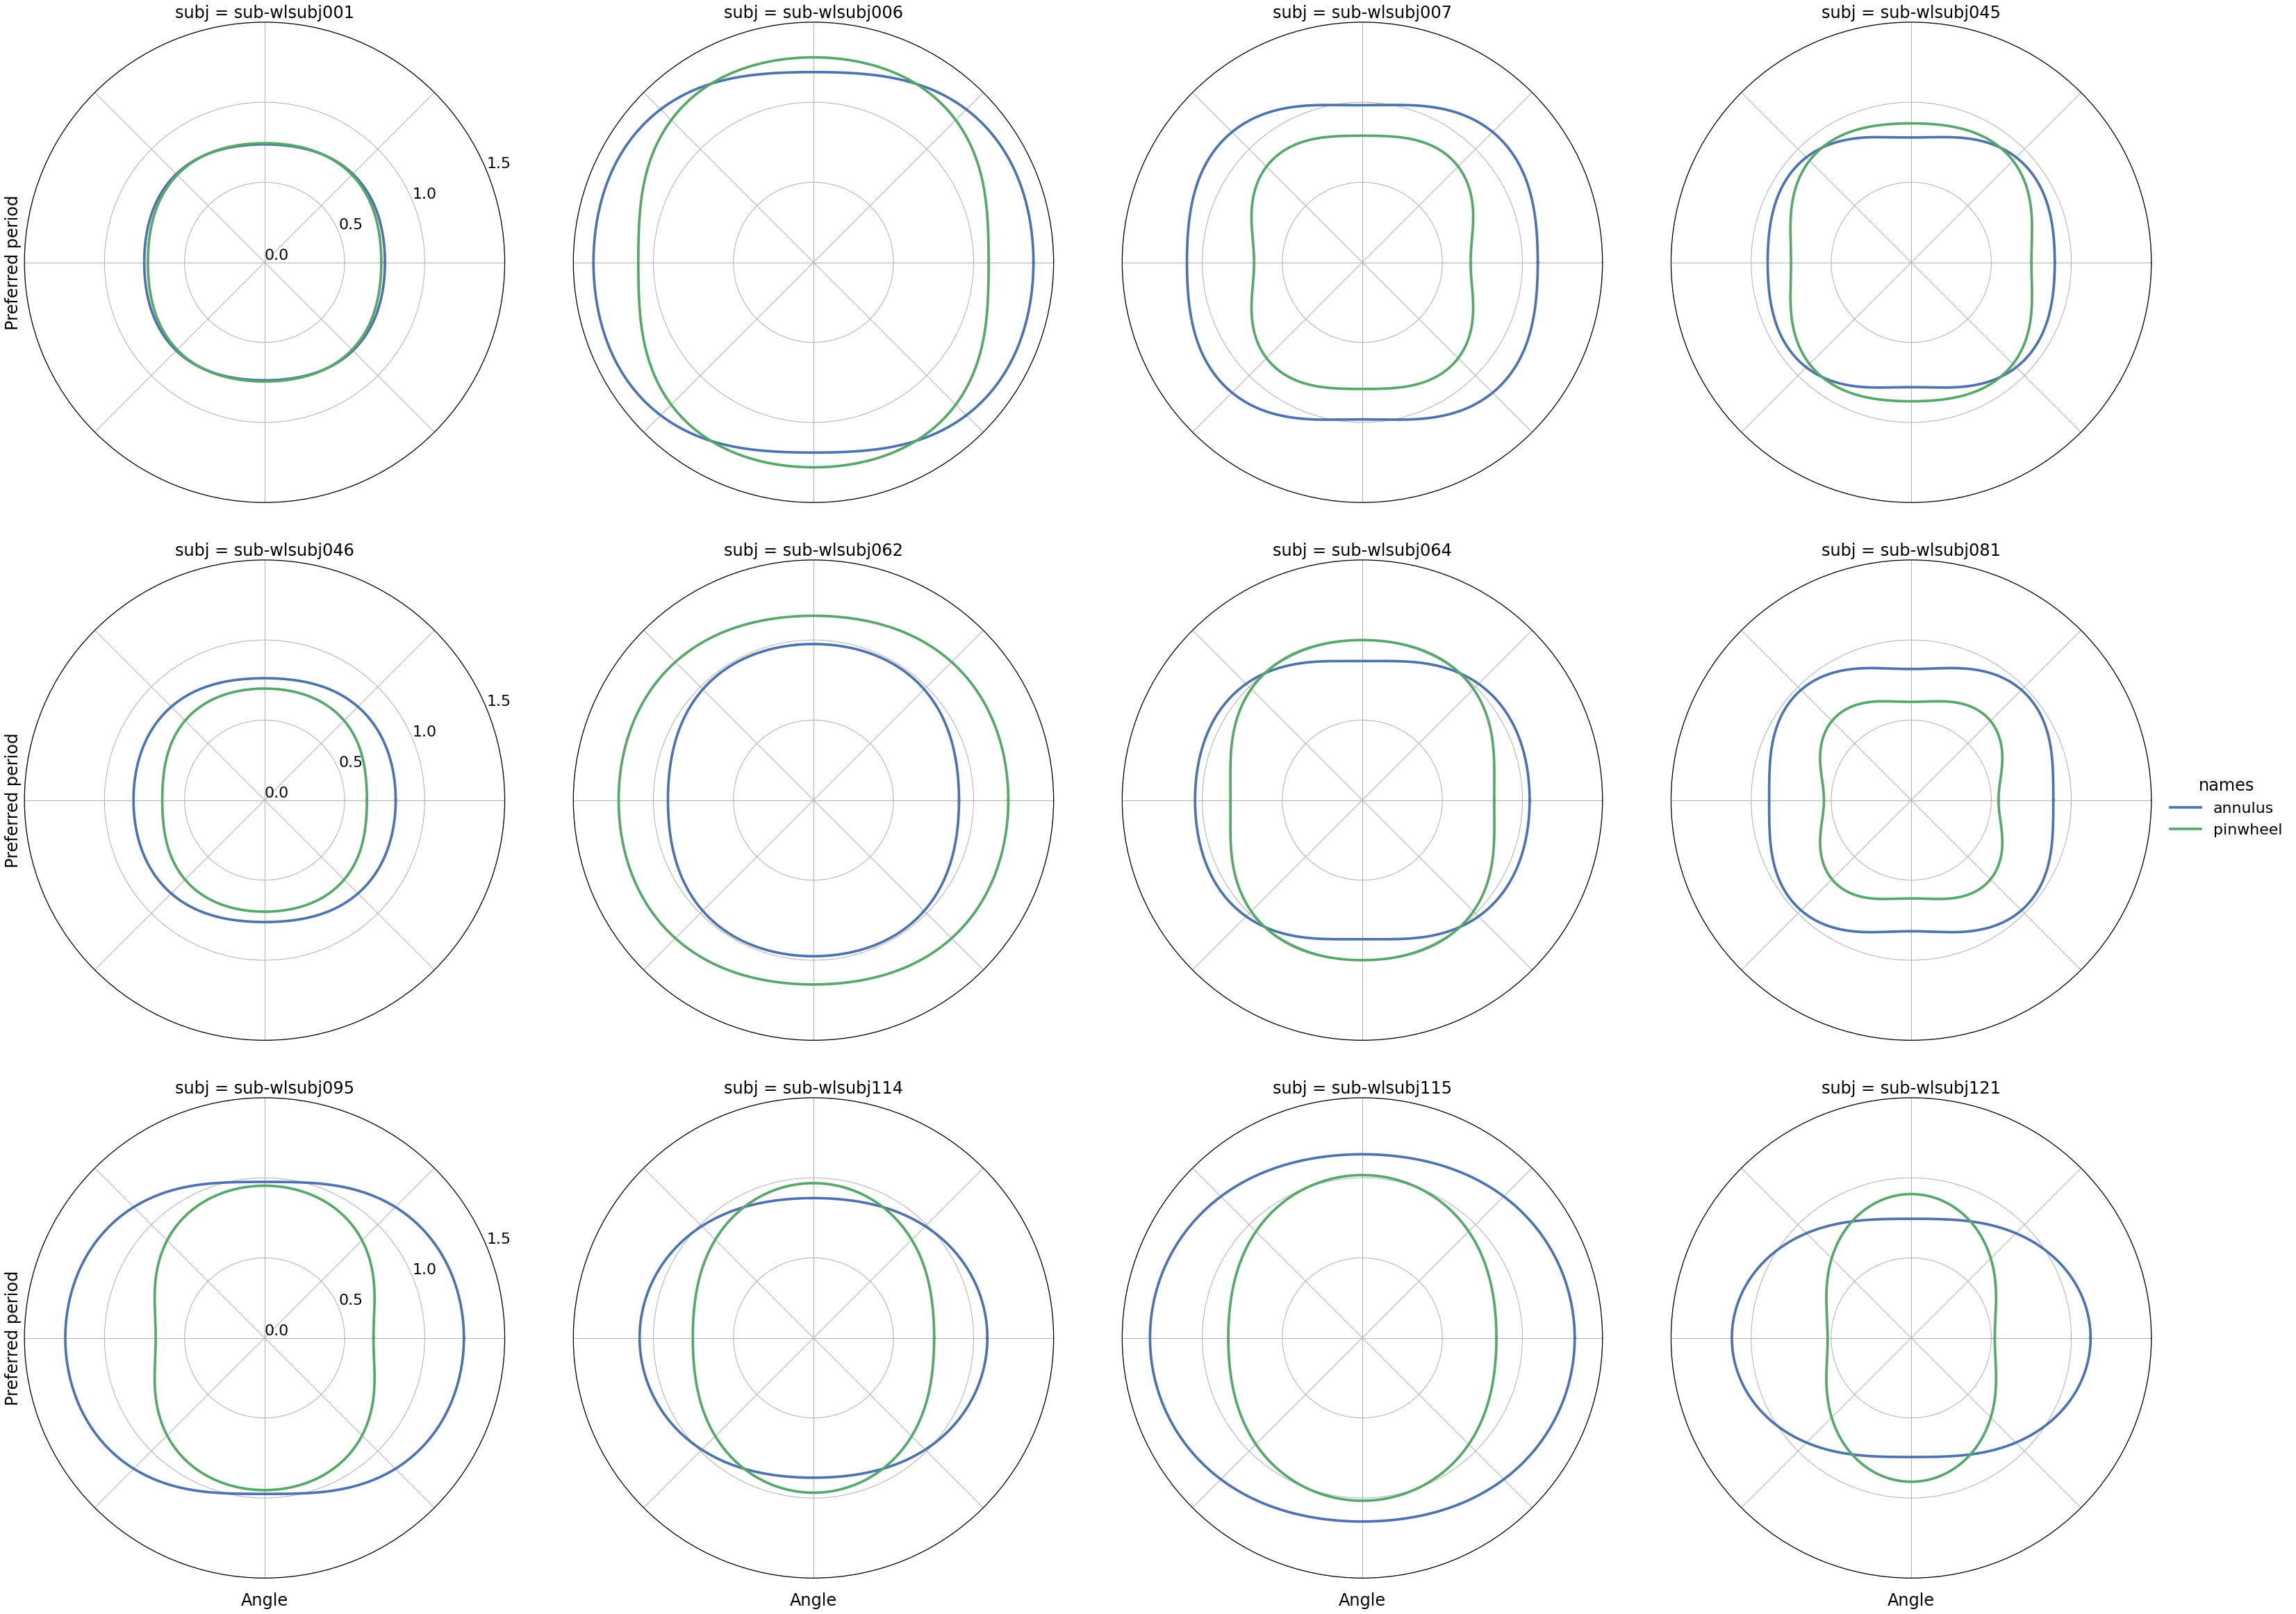

In [ ]:
stim_class = ['pinwheel','annulus']
vis.plot_2D_model_results.polarplot_preferred_period(new_subj_df.query('names in @stim_class & eccentricity == 5'), col='subj', height=11, save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_precision_weighted_polar_preferred_period_individual.png'))

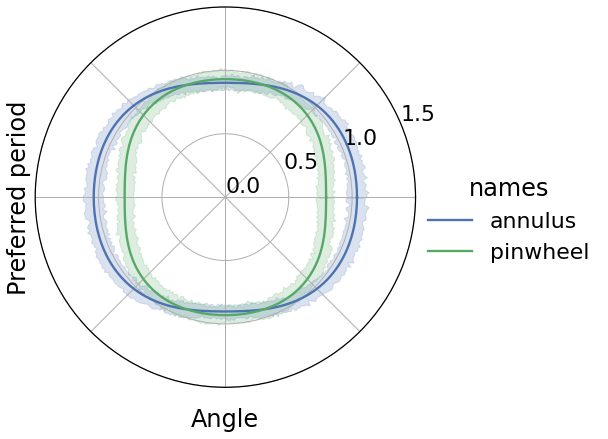

In [ ]:
vis.plot_2D_model_results.polarplot_preferred_period(new_subj_df.query('names in @stim_class & eccentricity == 5'), col=None, height=7, save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_precision_weighted_polar_preferred_period.png'))

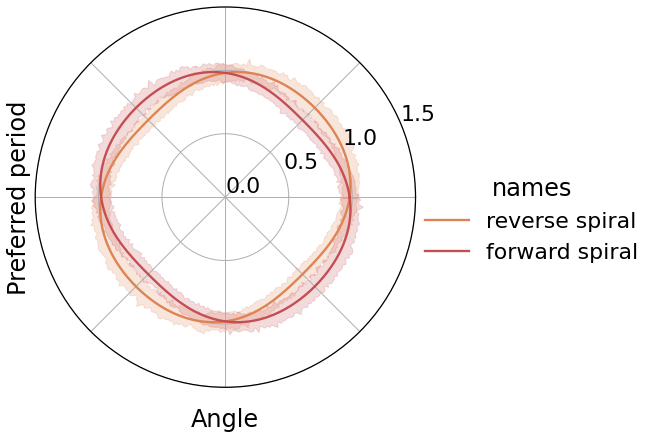

In [273]:
stim_class = ['forward spiral', 'reverse spiral']
vis.plot_2D_model_results.polarplot_preferred_period(new_subj_df.query('names in @stim_class & eccentricity == 5'), col=None, height=7, save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_precision_weighted_polar_preferred_period_spirals.png'))